## Задание 1  
>Постройте график зависимости весов всех признаков от lambda в L2-регуляризации на основе данных из урока.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams ['figure.figsize'] = [6, 3]

In [2]:
#Исходные данные
#Признаки
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])
#целевая переменная
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]


In [3]:
#функция ошибок
def mse_error(Y_cur,Y):
    return (np.sum((Y - Y_cur)**2))/len(Y)

In [4]:
#функция ошибок 2
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [5]:
def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = 2 * reg * W # градиент регуляризации
        
        W -= eta * (dQ + dReg)
        
        #if i % (iterations / 10) == 0:
            #print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

<AxesSubplot:ylabel='Count'>

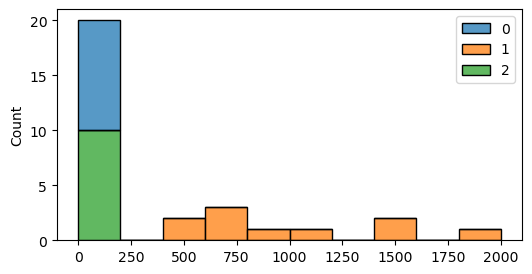

In [6]:
sns.histplot(X[:,1:], multiple="stack", bins = 10)

Видно,что признаки имеют разный масштаб.  
Применим процедуру стандартизации

In [7]:
#функция стандартизаии
#def standart_scale(X):
#    return (X-X.mean(axis=0))/X.std(axis=0)

In [8]:
def standard_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [9]:
X.mean(axis=0)

array([  1. ,   3. , 975. ,   1.7])

In [10]:
X_st = X.copy().astype(np.float64)
X_st[:, 1] = standard_scale(X_st[:, 1])
X_st[:, 2] = standard_scale(X_st[:, 2])
X_st[:, 3] = standard_scale(X_st[:, 3])

#X_st[:,1:3] = standart_scale(X_st[:,1:3]) 

In [11]:
X_st.mean(axis=0)

array([1.00000000e+00, 2.22044605e-17, 2.49800181e-17, 8.32667268e-17])

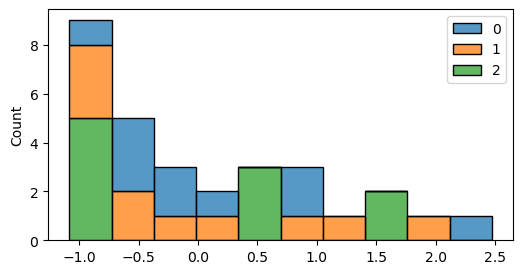

In [12]:
sns.histplot(X_st[:,1:], multiple="stack", bins = 10)
plt.show()

# 

In [13]:
number_lambd = 20
lambda_gr = np.linspace(1e-8,1,number_lambd) #массив значений параметра регуляризации
W = np.zeros((number_lambd, 4)) #массив весов
for ind,lambda_cur in enumerate(lambda_gr):
    W[ind] = gradient_descent_reg_l2(X_st, y, iterations=5000, eta=1e-1, reg=lambda_cur)
    


Final MSE: 24.904618876908742
Final MSE: 33.30403650121704
Final MSE: 54.893861459682434
Final MSE: 85.91395995531973
Final MSE: 123.7162573685047
Final MSE: 166.33348695294018
Final MSE: 212.2853072262198
Final MSE: 260.4514598844611
Final MSE: 309.98152332632714
Final MSE: 360.2290205840064
Final MSE: 410.7026734421391
Final MSE: 461.02999544526654
Final MSE: 510.9298792104152
Final MSE: 560.1918055738034
Final MSE: 608.6599704704181
Final MSE: 656.221093111709
Final MSE: 702.7950002549796
Final MSE: 748.3273183306575
Final MSE: 792.783776282419
Final MSE: 836.1457465496238


Text(0.5, 1.0, 'признак4')

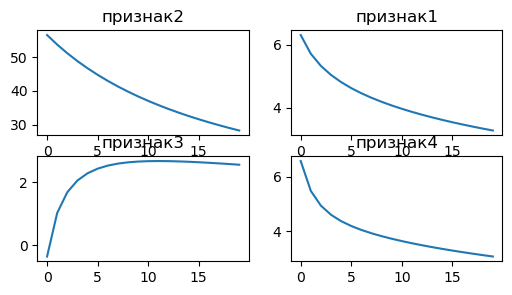

In [14]:
fig, ax = plt.subplots(2,2)
ax[0,0].plot(W[:,0])
ax[0,1].plot(W[:,1])
ax[1,0].plot(W[:,2])
ax[1,1].plot(W[:,3])
ax[0,1].set_title('признак1')
ax[0,0].set_title('признак2')
ax[1,0].set_title('признак3')
ax[1,1].set_title('признак4')

In [15]:
print(W[:,2])

[-0.35638845  1.02955765  1.69016989  2.06289822  2.29215999  2.43980545
  2.53683552  2.60052796  2.64127778  2.66571051  2.67824333  2.68192882
  2.67893914  2.67085772  2.65886242  2.64384442  2.62648785  2.60732438
  2.58677159  2.56516043]


## Задание 2 
>Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?


## Решение
Не имеет смысла. При стандартизации получается стандартное нормальное распределение, при котором значения признаков в принципе не ограничены. При нормализации значения признаков лежат в интервале от -1 до 1.

## Задание 3 
>Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

###  Решение  


In [16]:
def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        #dReg = 2 * reg * W # градиент регуляризации
        dRegeg = reg * np.sign(W) #новый коэффициент регуляризации 
        
        W -= eta * (dQ + dReg)
        
        #if i % (iterations / 10) == 0:
            #print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W